In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-09-27 13:59:54.385414: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-27 13:59:54.415423: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-27 13:59:54.870840: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Albuliformes e Elopiformes/RJ_Reconstrucao_Albuliformes&Elopiformes_2024_08_20.xlsx')

df_Ubarana = df[['Ano', 'Ubarana_rato_ind', 'Ubarana_ind']].dropna().reset_index(drop=True)



for i in range(len(df_Ubarana['Ano'])):
  df_Ubarana.loc[i,'Soma'] = df_Ubarana.loc[i,'Ubarana_rato_ind']+df_Ubarana.loc[i,'Ubarana_ind']
  
dados = df_Ubarana[['Ano','Ubarana_ind','Soma']]

#Fazendo as proporções
for i in range(len(dados['Ano'])):
  dados.loc[i,'Prop_Ubarana_ind'] = dados.loc[i,'Ubarana_ind'] / dados.loc[i,'Soma']


anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1978,1984,1985,1986,1987,1988,1989,2008,2009,2010,2011,2012,2013,2014])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

prop= dados['Prop_Ubarana_ind'].values
dados.head()


,Ano,Ubarana_ind,Soma,Prop_Ubarana_ind
0,2017,8.894,12.004,0.740920
1,2020,29.327,35.089,0.835789
2,2021,11.531,12.077,0.954790


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

prop_mean = np.mean(prop)
prop_std = np.std(prop)
prop_norm = (prop - prop_mean)/prop_std


In [7]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,prop_norm, epochs=15, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Albuliformes e Elopiformes/Desagregação Ubarana_geral_ind/pesos prop Ubarana_ind/.weights.h5', overwrite=True)

Epoch 1/15


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 964ms/step - loss: 0.9739
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9162
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.8707
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8239
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7697
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7061
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6320
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5509
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4631
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3737
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2907
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2217
Epoch 13/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1742
Epoch 14/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1507
Epoch 15/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1449


In [5]:
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Albuliformes e Elopiformes/Desagregação Ubarana_geral_ind/pesos prop Ubarana_ind/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.3672047 ]
 [0.40708643]
 [0.44696805]
 [0.4868497 ]
 [0.52673125]
 [0.56661296]
 [0.6064946 ]]


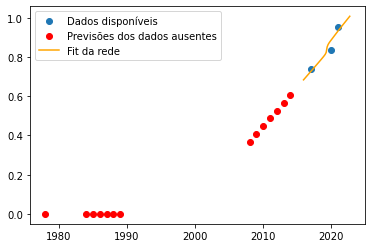

In [8]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*prop_std + prop_mean
prev_ausentes = model.predict(anos_para_prever_norm)*prop_std + prop_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0
    if prev_ausentes[i]>1:
        prev_ausentes[i]=1

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,prop,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*prop_std + prop_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

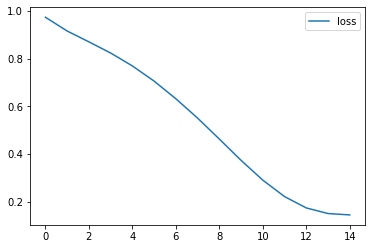

In [9]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [10]:
#Lista de anos sem buracos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*prop_std + prop_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0
    if prev_continua[i]>=1:
        prev_continua[i]=1

np.save('prev_Ubarana_ind',prev_continua)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
